In [1]:
import numpy as np
import librosa
import glob
import os
from random import randint
import torch
import torch.nn as nn
from torch.utils import data
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline


import import_ipynb
from sen_dataloader import *
from sen_net import *

importing Jupyter notebook from sen_dataloader.ipynb
importing Jupyter notebook from sen_net.ipynb


In [2]:
#Loss is every data_batch loss
#meanLoss is Loss[:-100]/100

def plot(loss,mean_loss):
    from IPython import display
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.figure(figsize=(20,10))
    plt.clf()

    plt.title('Training...')
    plt.xlabel('iterator')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(mean_loss)
    plt.show()

In [3]:
torch.cuda.set_device(3)
print(torch.cuda.current_device())

SENmodel = SEN_classify().double().cuda()

3


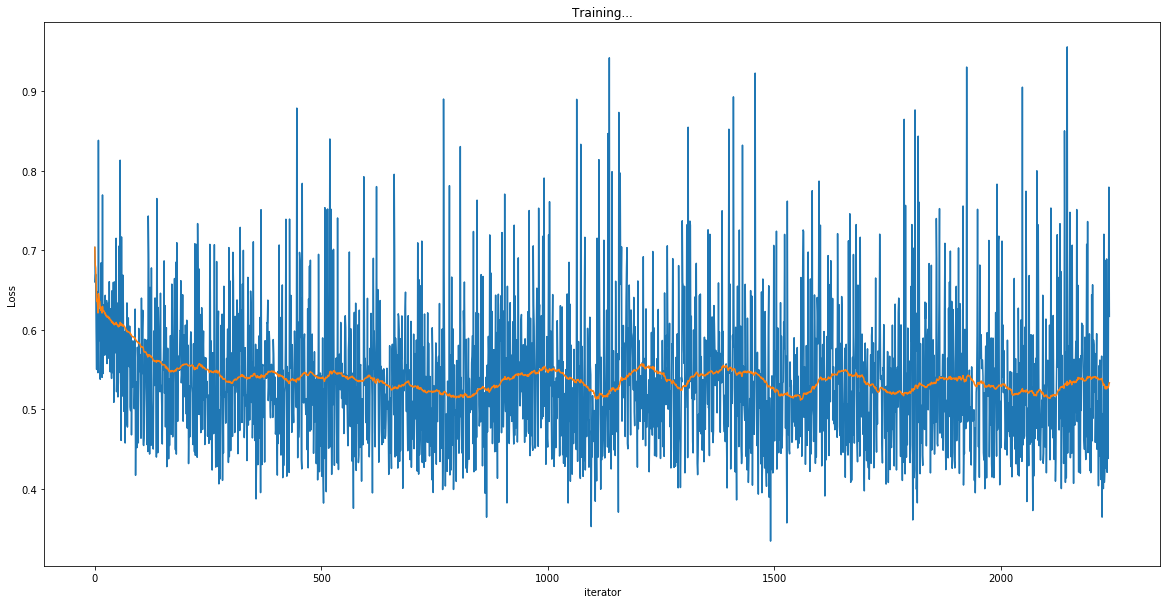

In [4]:
max_epoch = 1
optimizer = optim.Adam(SENmodel.parameters(), lr=1e-3)

weight = [1,0.2]
class_weights = torch.DoubleTensor(weight).cuda()
lossFunc = nn.CrossEntropyLoss(weight=class_weights)

cal_loss_list = []
cal_mean_loss_list = []

# 大概3.6w pair训练数据
for epoch in range(max_epoch):
    running_loss = 0.0
    for i, data in enumerate(training_generator, 0):
        inputs, labels = data
        labels = labels.cuda()
        x1 = torch.transpose((inputs[...,0]),2,3).cuda()
        x2 = torch.transpose((inputs[...,1]),2,3).cuda()
        
        optimizer.zero_grad()
        outputs = SENmodel(x1,x2)
        loss = lossFunc(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss = loss.item()
        cal_loss_list.append(running_loss)
        if(i<100):
            cal_mean_loss_list.append(sum(cal_loss_list)/len(cal_loss_list))
        else:
            cal_mean_loss_list.append(sum(cal_loss_list[-100:])/100)

        if(i%10 == 0):
            plot(cal_loss_list,cal_mean_loss_list)


In [5]:
torch.save(SENmodel.state_dict(), '../../model/baseline_sen.pkl')
print('Finished Training')

Finished Training


In [7]:
####  every 10 batch to plot one picture
with open('./baseline_sen_loss.txt', 'w') as the_file:
    for token in cal_loss_list:
        the_file.write(str(token)+"\n")
        
with open('./baseline_sen_meanloss.txt', 'w') as the_file:
    for token in cal_mean_loss_list:
        the_file.write(str(token)+"\n")

print(len(cal_loss_list),len(cal_mean_loss_list))

2250 2250
